In [1]:
import pandas as pd
import requests
from gensim.models import Word2Vec
import numpy as np 

In [2]:
# URL of the dataset
url = "https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/tmdb_5000_movies.csv"
response = requests.get(url, verify=False)

/Users/mario.iuliano/marios_env/Portfolio/.env/lib/python3.10/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [3]:
# Write csv
with open('tmdb_5000_movies.csv', 'wb') as file:
    file.write(response.content)

In [4]:
# Read csv
df = pd.read_csv('tmdb_5000_movies.csv')

In [5]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
df['overview'] = df['overview'].fillna('')

In [7]:
# Use 'overview' to create embeddings 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mario.iuliano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mario.iuliano/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mario.iuliano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Function to process text
def process_text(text): 
    #convert to string if not string 
    if not isinstance(text,str): 
        text = str(text)
    
    # Lower case
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text, language='english', preserve_line=True)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [9]:
#apply 
df['tokenized_overview'] = df['overview'].astype(str)

In [10]:
corpus = df['tokenized_overview'].tolist()

In [11]:
word_tokenize = [process_text(text) for text in corpus]

In [12]:
# Build model 
model = Word2Vec(word_tokenize, vector_size=100, window=5, min_count=1, workers=4)
print("Vocabulary size {}".format(len(model.wv.key_to_index)))

Vocabulary size 18146


In [13]:
model.wv.index_to_key[:10]

['life', 'find', 'new', 'one', 'young', 'world', 'friend', 'get', 'two', 'man']

In [14]:
words = model.wv.index_to_key   
word_embeddings = [model.wv[word] for word in words]

In [15]:
embeddings_df = pd.DataFrame(word_embeddings, index = words)

In [42]:
#Create movie embeddings by averaging the embeddings of the words in the overview
def get_movie_embedding(tokenized_text, model, embedding_size = 100): 
    vali_embeddings = [model.wv[word] for word in tokenized_text if word in model.wv]
    if len(vali_embeddings) == 0: 
        return np.zeros(embedding_size)
    return np.mean(vali_embeddings, axis=0)
    

In [43]:
embedding_size = model.vector_size

In [44]:
movie_embeddings = [get_movie_embedding(movie, model, embedding_size) for movie in word_tokenize]

In [45]:
movies = df['original_title'].tolist()

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [47]:
pca = PCA(n_components=2)

In [48]:
word_vectors_pca = pca.fit_transform(movie_embeddings[:50])

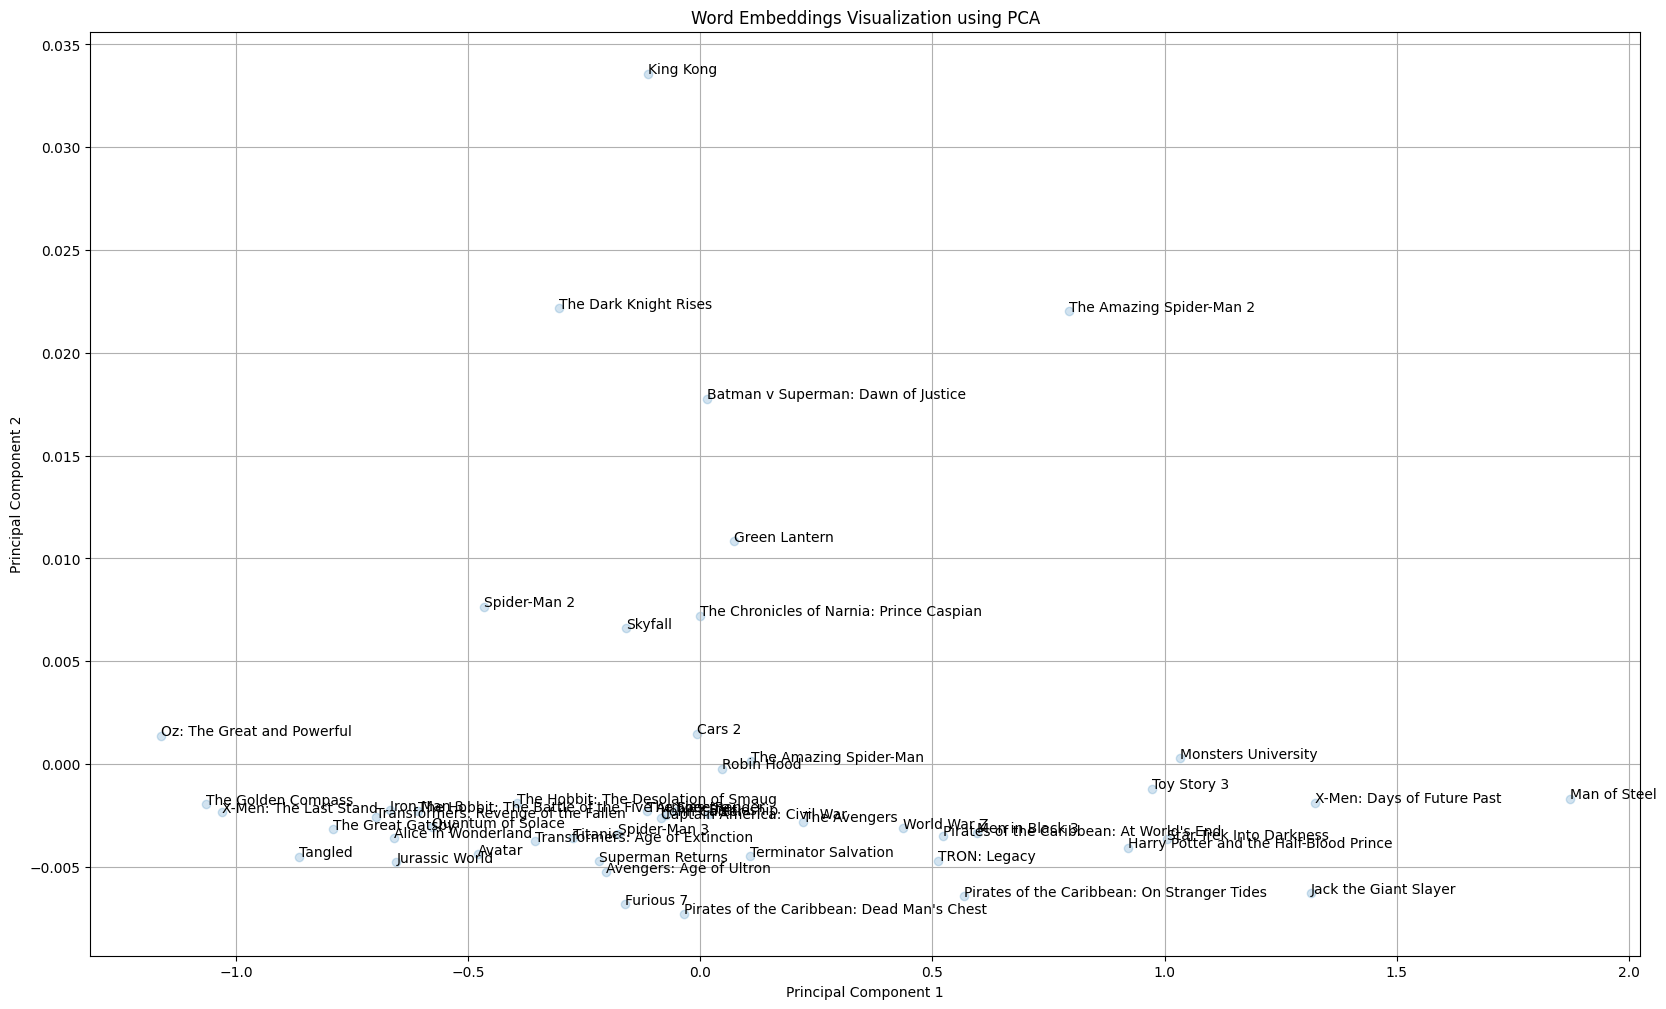

In [49]:
plt.figure(figsize=(20,12))
plt.scatter(word_vectors_pca[:,0], word_vectors_pca[:,1], alpha=0.2)
# Annotate each point with the word
for i, word in enumerate(movies[:50]):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))
    # Display the plot
plt.title("Word Embeddings Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()